<a href="https://colab.research.google.com/github/Abdul-Rahman258/ML_Practice/blob/main/Support_Vector_Machine_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: load the headbrain.csv

import pandas as pd

# Load the dataset
data = pd.read_csv('headbrain.csv')

# Print the first few rows to verify
print(data.head())


   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [2]:
# prompt: analyze the dataset and train a support vector machine, machine learning model upon it and give me it accuracy

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Head Size' is the feature and 'Brain Weight' is the target
X = data['Head Size(cm^3)'].values.reshape(-1, 1)
y = data['Brain Weight(grams)'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the SVR model
model = SVR(kernel='linear') # You can experiment with different kernels
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# The R-squared value indicates the goodness of fit.  Closer to 1 is better.
# The MSE measures the average squared difference between the actual and predicted values.
# Lower MSE is preferred.


Mean Squared Error: 5194.836898709128
R-squared: 0.6380390573581638


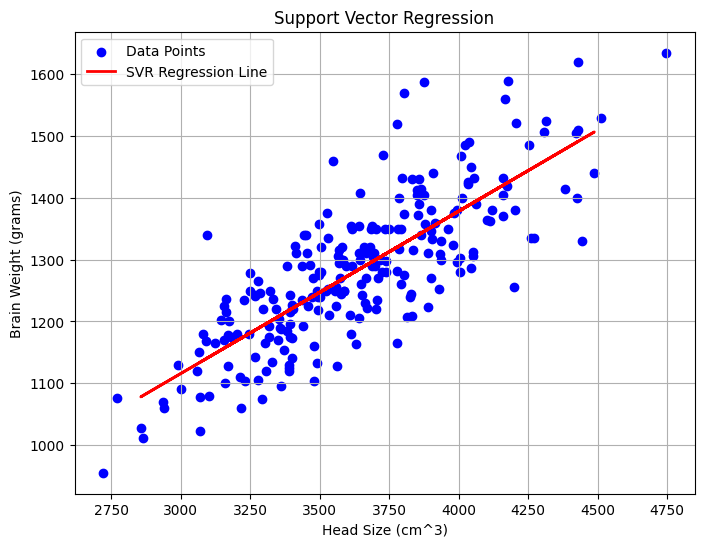

In [3]:
# prompt: visualize the data set for better understanding

import matplotlib.pyplot as plt

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='SVR Regression Line')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.title('Support Vector Regression')
plt.legend()
plt.grid(True)
plt.show()


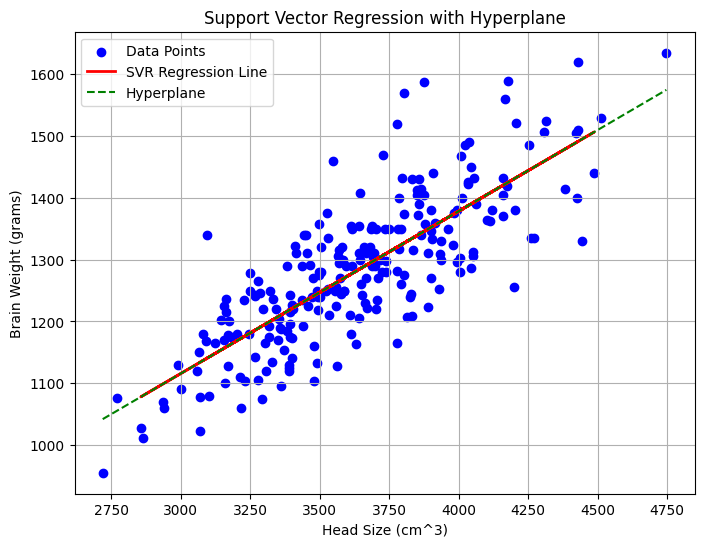

In [4]:
# prompt: visualize the dataset with hyper plane and everything

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming it's in the same directory as the notebook)
data = pd.read_csv('headbrain.csv')

# ... (your existing code for data preprocessing and model training)

# Visualize the data with hyperplane
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='SVR Regression Line')

# Get the coefficients and intercept of the hyperplane
w = model.coef_[0]
b = model.intercept_

# Create points for the hyperplane
x_hyperplane = np.linspace(X.min(), X.max(), 100)  # Create evenly spaced points within the data range
y_hyperplane = w * x_hyperplane + b

plt.plot(x_hyperplane, y_hyperplane, color='green', linestyle='--', label='Hyperplane')

# Add labels, title, and legend
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.title('Support Vector Regression with Hyperplane')
plt.legend()
plt.grid(True)
plt.show()


Largest distance from a data point to the hyperplane: 235.15920674934532


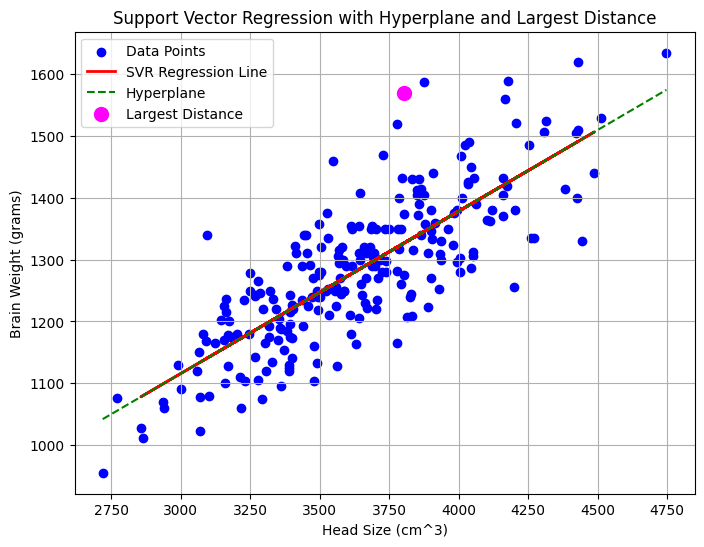

In [6]:
# prompt: how is it the largest difference from the data points as we need to see the largest difference from the hyperplane

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('headbrain.csv')

# Assuming 'Head Size' is the feature and 'Brain Weight' is the target
X = data['Head Size(cm^3)'].values.reshape(-1, 1)
y = data['Brain Weight(grams)'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the SVR model
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Visualize the data with hyperplane and distances
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='SVR Regression Line')

# Get the coefficients and intercept of the hyperplane
w = model.coef_[0]
b = model.intercept_

# Create points for the hyperplane
x_hyperplane = np.linspace(X.min(), X.max(), 100)
y_hyperplane = w * x_hyperplane + b

plt.plot(x_hyperplane, y_hyperplane, color='green', linestyle='--', label='Hyperplane')

# Calculate distances from data points to the hyperplane
distances = []
for i in range(len(X)):
    distance = abs(w * X[i] - y[i] + b) / np.sqrt(w**2 + 1)
    distances.append(distance)

# Find the largest distance
largest_distance = np.max(distances)
largest_distance_index = np.argmax(distances)


# Highlight the point with the largest distance
plt.scatter(X[largest_distance_index], y[largest_distance_index], color='magenta', s=100, label='Largest Distance')

print(f"Largest distance from a data point to the hyperplane: {largest_distance}")


# Add labels, title, and legend
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.title('Support Vector Regression with Hyperplane and Largest Distance')
plt.legend()
plt.grid(True)
plt.show()
